# NEXT SILICON VALLEY US MARKET PREDICTIONS
In this notebook illustrates the plotting of the synthetic dataset (generated by [Chatgpt](https://www.chatgpt.com)) "tech market predition"

In [13]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


### Import libraries
...installed in the previous notebook "[plotting_tech_jobs](plotting_tech_jobs.ipynb)"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import mplcyberpunk
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

### Loading datasets, adding longitude and latitude

loading dataset tech_market_prediction_2035

In [15]:
market_predictions_df = pd.read_csv('../datasets/tech_market_prediction_2035.csv')
market_predictions_df.head()

,city,state_id,tech_market_Billions_2035,tech_market_2023
0,San Francisco,CA,820.0,456.73
1,New York,NY,760.0,423.77
2,Seattle,WA,540.0,301.00
3,Austin,TX,480.0,267.73
4,Boston,MA,450.0,250.88


loading [uscities](https://simplemaps.com/data/us-cities) dataset for lat,lng join

In [16]:
cities_df = pd.read_csv('../datasets/uscities.csv')
cities_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18832416,10943.7,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11885717,3165.8,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8489066,4590.3,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6113982,4791.1,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,6046392,1386.5,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


In [17]:
# Merge jobs_df with cities_df on city and state_id to get the corresponding latitude and longitude
merged_df = pd.merge(market_predictions_df, cities_df[['city', 'state_id', 'lat', 'lng']], on=['city', 'state_id'], how='left')

# Add the latitude and longitude columns to jobs_df
market_predictions_df['lat'] = merged_df['lat']
market_predictions_df['lng'] = merged_df['lng']

# Display the updated market_predictions_df
market_predictions_df.head()

,city,state_id,tech_market_Billions_2035,tech_market_2023,lat,lng
0,San Francisco,CA,820.0,456.73,37.7558,-122.4449
1,New York,NY,760.0,423.77,40.6943,-73.9249
2,Seattle,WA,540.0,301.00,47.6211,-122.3244
3,Austin,TX,480.0,267.73,30.3005,-97.7522
4,Boston,MA,450.0,250.88,42.3188,-71.0852


### A little experiment
let's plot the growth distribution referring to the longitude (let's see how the growth and the current market near the coastal cities vs internal states)

Optional: cyberpunk plt theme

In [18]:
plt.style.use('cyberpunk')

In [19]:
sorted_df = market_predictions_df.sort_values(by='lng')
sorted_df.dropna(inplace=True)
sorted_df.head()

,city,state_id,tech_market_Billions_2035,tech_market_2023,lat,lng
18,Portland,OR,170.0,95.11,45.5371,-122.6500
0,San Francisco,CA,820.0,456.73,37.7558,-122.4449
2,Seattle,WA,540.0,301.00,47.6211,-122.3244
20,San Jose,CA,520.0,289.00,37.3012,-121.8480
76,Yakima,WA,3.0,1.68,46.5923,-120.5496


In [26]:
sorted_df.shape

(96, 6)

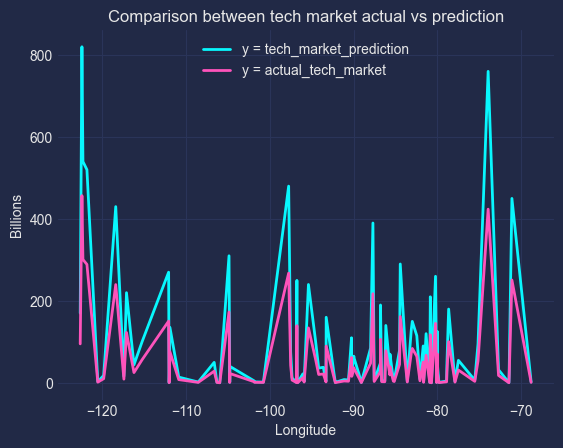

In [21]:
# Create the plot
plt.plot(sorted_df['lng'], sorted_df['tech_market_Billions_2035'],  label='y = tech_market_prediction', linewidth=2)
plt.plot(sorted_df['lng'], sorted_df['tech_market_2023'],  label='y = actual_tech_market', linewidth=2) 
plt.xlabel('Longitude')
plt.ylabel('Billions')
plt.title('Comparison between tech market actual vs prediction')
plt.legend()  # Show legend to differentiate the lines
plt.show()

This seems useless data visualization, but coastal cities have always the advantage to take more migrants by sea, therefore potential engineers, startuppers, etc!

Mhhhh these lines seems too hard. To better plot, let's smooth them with numpy

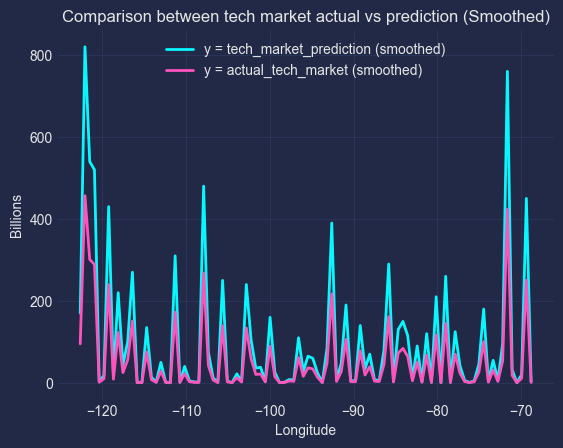

In [ ]:
x_new = np.linspace(sorted_df['lng'].min(), sorted_df['lng'].max(), 96)


y1_new = interp1d(x_new, sorted_df['tech_market_Billions_2035'])
y2_new = interp1d(x_new, sorted_df['tech_market_2023'])


plt.plot(x_new, y1_new(x_new), label='y = tech_market_prediction (smoothed)', linewidth=2)
plt.plot(x_new, y2_new(x_new), label='y = actual_tech_market (smoothed)', linewidth=2)
plt.xlabel('Longitude')
plt.ylabel('Billions')
plt.title('Comparison between tech market actual vs prediction (Smoothed)')
plt.legend()
plt.show()

A little bit more clean!

### Final plotting
Let's plot the data in the USA map as before:

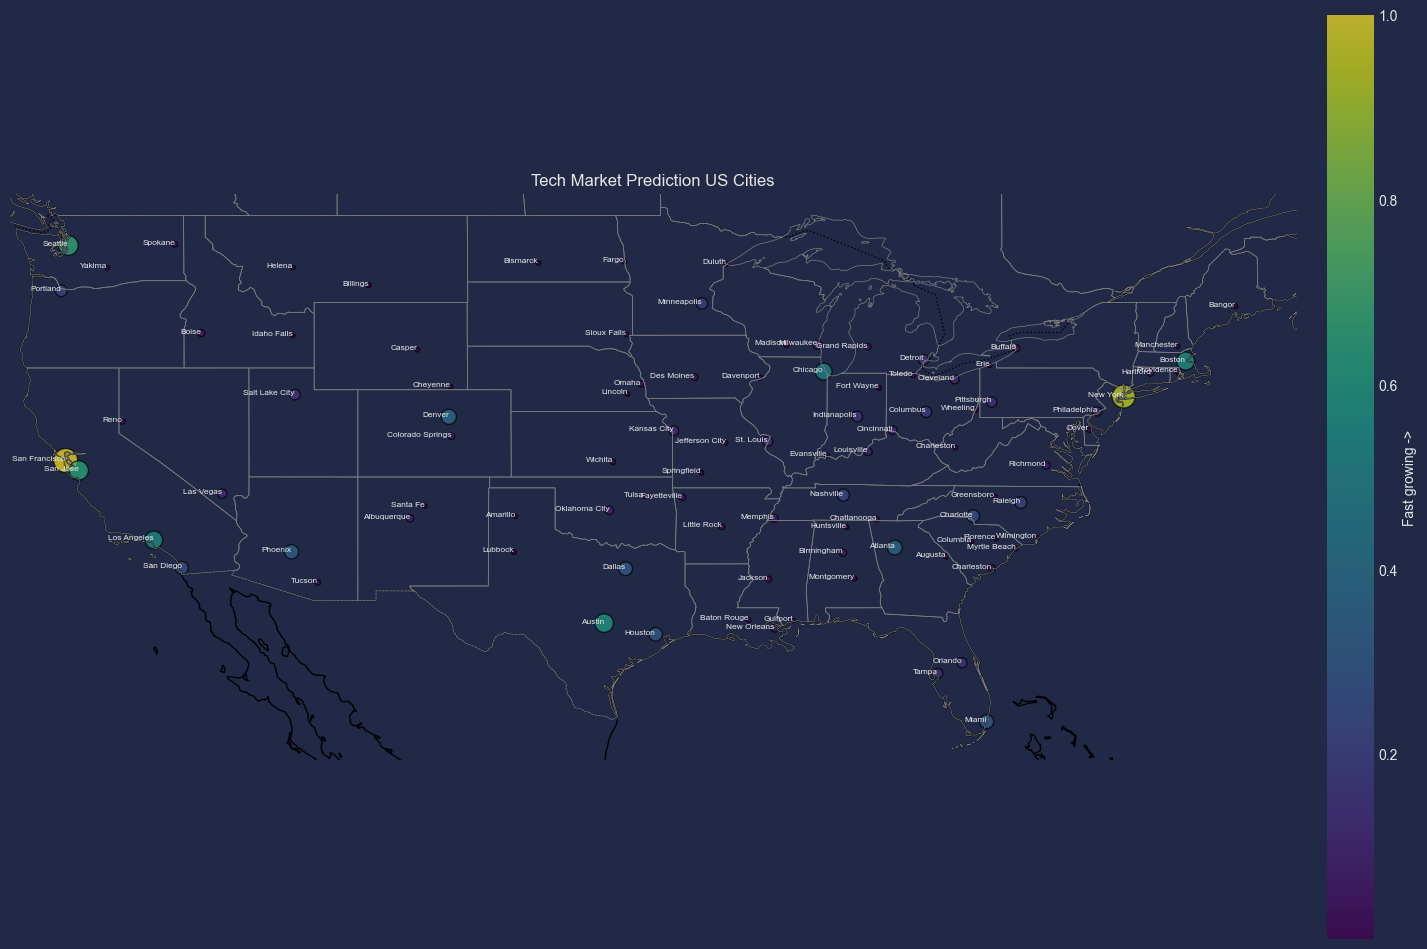

In [59]:
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-125, -66, 24, 50], crs=ccrs.PlateCarree())  # USA Boundaries

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.STATES, edgecolor="gray", linewidth=0.5)

# Normalize sizes and colors
size_min, size_max = 10, 300
color_map = plt.cm.viridis
difference_markets = market_predictions_df["tech_market_Billions_2035"]-market_predictions_df["tech_market_2023"]
market_predictions_df["size"] = market_predictions_df["tech_market_Billions_2035"] / market_predictions_df["tech_market_Billions_2035"].max() * (size_max - size_min) + size_min # Normalize size [0,1]
market_predictions_df["color"] = difference_markets / difference_markets.max()  # Normalize colors [0,1]

# Scatter plot
sc = ax.scatter(market_predictions_df["lng"], market_predictions_df["lat"], s=market_predictions_df["size"], c=market_predictions_df["color"], cmap=color_map, alpha=0.7, edgecolors="black")

# Colorbar for `postdate_timespan`
cbar = plt.colorbar(sc, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label("Fast growing ->")

# Add city labels (not too much because of space)
for _, row in market_predictions_df.iterrows():
    ax.text(row["lng"], row["lat"], row["city"], fontsize=6, transform=ccrs.PlateCarree(), ha="right")

plt.title("Tech Market Prediction US Cities")
plt.show()

We can see that the crown of the west-coast "Silicon Valley" is nearly untouchable (maybe NYC have some chance)

### Export dataset
Same as before, now we can export the dataset with longitude and latitude coordinates:

In [60]:
market_predictions_df.to_csv("../datasets/next_silicon_valley_prediction.csv")